<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_nested_list = pd.read_csv(DATA_FILE, delimiter='\t')

file_nested_list.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [93]:
# extract column names
header = file_nested_list.columns
print(header)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [137]:
# create a dataframe of just values
data=pd.DataFrame.from_records(file_nested_list.values)
data.head(5)


,0,1,2,3,4
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [135]:
# item_price is a string because it has a $ sign. I remove dollar sign and convert datatype to float
item_price_float = file_nested_list.item_price.replace( '\$','', regex=True ).astype(float)

#multiply float price of an item with quantity to get order amount
order_price = item_price_float * file_nested_list.quantity

#calculate and print the average order price
average_order_price = order_price.mean()
print(average_order_price)


8.489186499350943


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [129]:
# filter by specified item_names and then drop duplicate rows. keep just choice description column.
unique_sodas = file_nested_list.loc[file_nested_list.item_name.isin(['Canned Soda','Canned Soft Drink'])].drop_duplicates(subset='choice_description').choice_description

print(unique_sodas)

18              [Sprite]
28          [Dr. Pepper]
51        [Mountain Dew]
117    [Diet Dr. Pepper]
126          [Coca Cola]
162          [Diet Coke]
263               [Coke]
346           [Lemonade]
610             [Nestea]
Name: choice_description, dtype: object


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [162]:
# create a list of burritos only and extract their choice description which contains toppings in the burrito orders
buritto_orders_toppings = file_nested_list.loc[file_nested_list.item_name.str.contains("Burrito")].choice_description

#toppings in choice description column are separated by comma. I count the number of commas and add 1 to that number
#because number of elements between commas is n+1, where n is number of commas. for example, [a,b,c] has 2 commas and 3
#elements.

toppings = buritto_orders_toppings.str.count(',')+1
avg_toppings = toppings.mean()

print(avg_toppings)


5.395051194539249


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [181]:
# filter the dataframe for chips only 
chip_orders = file_nested_list.loc[file_nested_list.item_name.str.contains("Chips")]

# add up and group by taking quantity into account
chip_order_amounts = chip_orders.groupby('item_name').quantity.agg('sum')

# use to_dict() method to create a dictionary
chip_order_amounts.to_dict()


{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


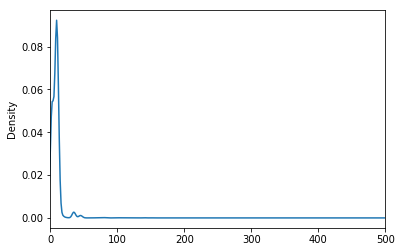

In [182]:
order_price.plot(kind='density', xlim=(0, 500));

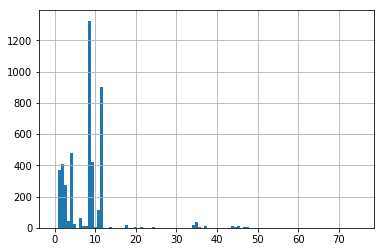

In [190]:
#most orders are really small, chipotle may focus on marketing its catering services.
order_price.hist(bins=100, range = [0,75])